# Arbre de régression
## Dataset : diabetes

## librairies

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot  
from sklearn import tree

C:\Users\Benhajji\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Importation des données 

In [7]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

## Modèle de régression : Ardre de décision 

In [16]:
def decisionTreeRegression(X,y,max_depth=None,split_param={'test_size':0.2,'random_state':0}) :
    ## Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_param['test_size'], random_state = split_param['random_state'])
    # default parameters
    ## Training the Multiple Linear Regression model on the Training set
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(X_train, y_train)
    ## Predicting the Test set results
    y_pred = regressor.predict(X_test)
    ## Evaluating the model 
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 =1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
    print('MAE : ',mae)
    print('MSE : ',mse)
    print('R² : ',r2)
    print('Adjusted R² : ',adj_r2)
    return [mae,mse,rmse,r2,adj_r2]

In [17]:
regressor = decisionTreeRegression(X,y,split_param={'test_size':0.3,'random_state':0})

MAE :  61.61654135338346
MSE :  6003.496240601504
R² :  -0.17681198070724125
Adjusted R² :  -0.27327197912586754


In [20]:
regressor = decisionTreeRegression(X,y,max_depth=2,split_param={'test_size':0.3,'random_state':0})

MAE :  50.17373330010989
MSE :  4029.0729322641987
R² :  0.2102166624565578
Adjusted R² :  0.14548032331365268


In [23]:
regressor = decisionTreeRegression(X,y,max_depth=3,split_param={'test_size':0.3,'random_state':0})

MAE :  51.11031742379229
MSE :  4213.982543717215
R² :  0.1739704756705679
Adjusted R² :  0.10626313761077844


In [24]:
regressor = decisionTreeRegression(X,y,max_depth=4,split_param={'test_size':0.3,'random_state':0})

MAE :  51.426687696089466
MSE :  4274.4598544905275
R² :  0.16211564624672892
Adjusted R² :  0.09343660085711658


## Decision Tree Regression Visualization 

In [20]:
regressor = decisionTreeRegression(X,y,max_depth=2,split_param={'test_size':0.3,'random_state':0})

MAE :  50.17373330010989
MSE :  4029.0729322641987
R² :  0.2102166624565578
Adjusted R² :  0.14548032331365268


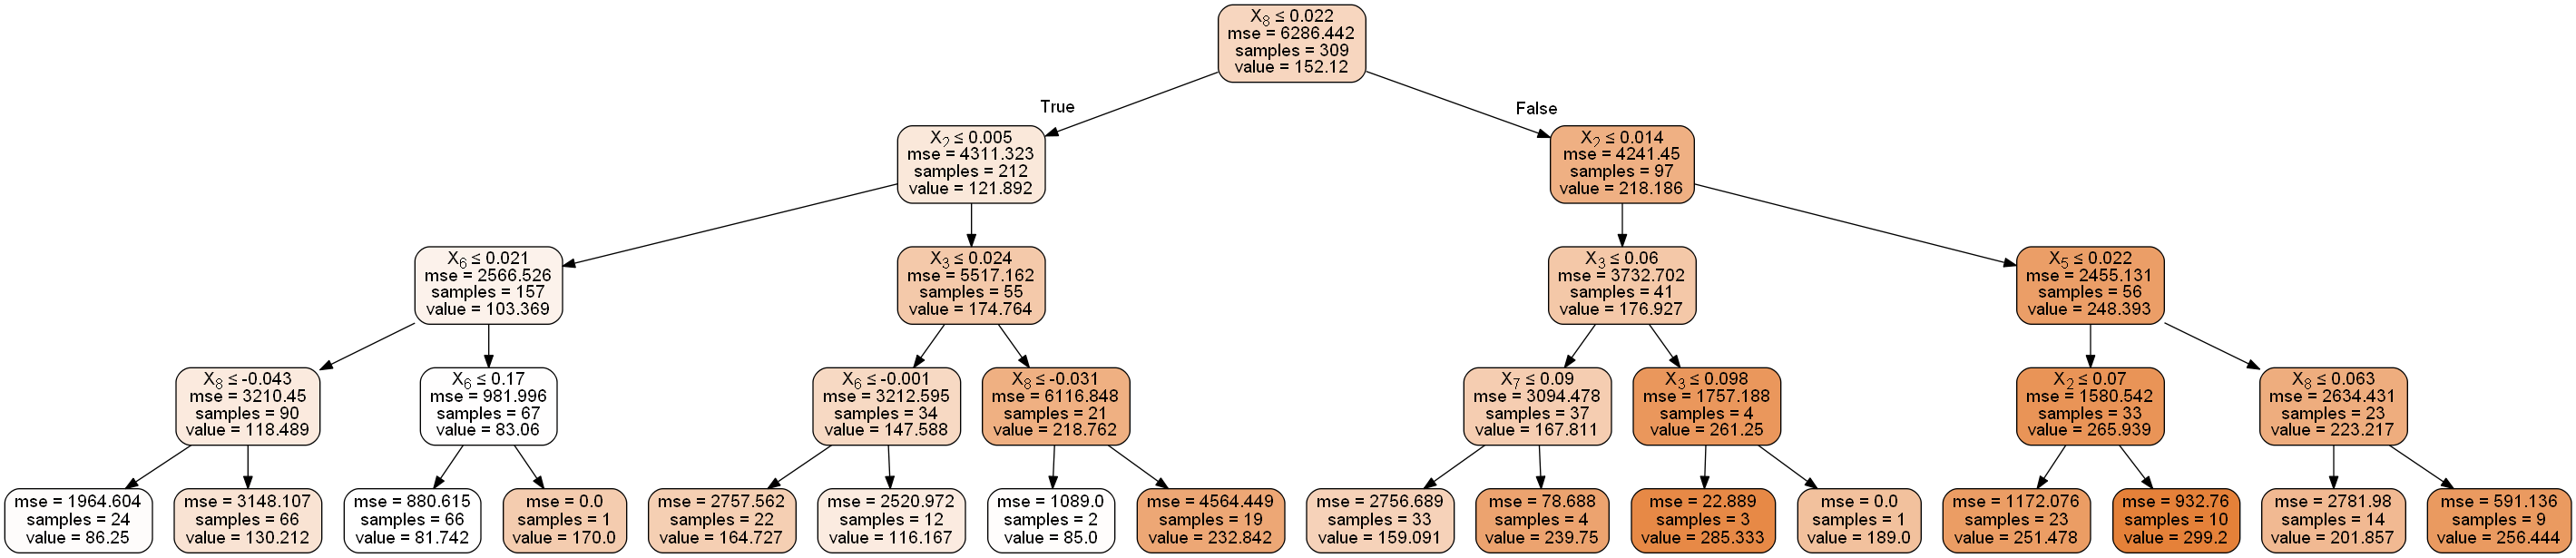

In [15]:
dot_data = StringIO()  
tree.export_graphviz(regressor[0], out_file=dot_data,  
    filled=True, rounded=True,
    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  